In [0]:
import numpy as np
import pandas as pd
from matplotlib import pyplot
from sklearn.metrics import accuracy_score
import random
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [0]:
def initialise(X, last, random_state):
  np.random.seed(random_state)
  w1 = np.random.randn(X.shape[1], last) * np.sqrt(2. / X.shape[1])
  b1 = np.random.randn(1, last)
  w2 = np.random.randn(last, 1) * np.sqrt(2. / last)
  b2 = np.random.randn(1, 1)
  return w1, b1, w2, b2

In [0]:
def sigmoid(z):
  return 1 / (1 + np.exp(-z))

In [0]:
def relu(z):
  return np.maximum(z, 0)

In [0]:
def relu_prime(z):
    return (z > 0) * 1

In [0]:
def forward_prop(X, w1, b1, w2, b2):
  z1 = np.dot(X, w1) + b1
  a1 = relu(z1)
  z2 = np.dot(a1, w2) + b2
  a2 = sigmoid(z2)
  return z1, a1, z2, a2

In [0]:
def backward_prop(X, y, w1, w2, z1, a1, a2):
  dz2 = a2 - y
  dw2 = np.dot(a1.T, dz2) / X.shape[0]
  db2 = np.sum(dz2, axis = 0, keepdims= True) / X.shape[0]

  dz1 = np.dot(dz2, w2.T) * relu_prime(z1)
  dw1 = np.dot(X.T, dz1 / X.shape[0])
  db1 = np.sum(dz1, axis = 0, keepdims= True) / X.shape[0]

  return dz1, dw1, db1, dz2, dw2, db2

In [0]:
def update(alpha, w1, b1, w2, b2, dw1, db1, dw2, db2):
  w2 = w2 - (alpha * dw2)
  b2 = b2 - (alpha * db2)
  
  w1 = w1 - (alpha * dw1)
  b1 = b1 - (alpha * db1)
  return w1, b1, w2, b2

In [0]:
def loss(y, y_hat):
  L = -((y * np.log(y_hat + 1e-15)) + ((1 - y ) * np.log(1 - y_hat + 1e-15))) / y.shape[0]
  return np.nansum(L)

In [0]:
def train(X_train, y_train, X_test, y_test, epochs, alpha, last):
    
  w1, b1, w2, b2 = initialise(X_train, last = last, random_state=0)

  for i in range(epochs+1):

    z1, a1, z2, a2 = (forward_prop(X_train, w1, b1, w2, b2))
    dz1, dw1, db1, dz2, dw2, db2 = backward_prop(X_train, y_train, w1, w2, z1, a1, a2)
    w1, b1, w2, b2 = update(alpha, w1, b1, w2, b2, dw1, db1, dw2, db2)

    if i % (epochs / 10) == 0:
      z1, a1, z2, a2_train = (forward_prop(X_train, w1, b1, w2, b2))
      pred_train = np.where(a2_train > 0.5, 1, 0)

      _, _, _, a2_test = (forward_prop(X_test, w1, b1, w2, b2))
      pred_test = np.where(a2_test > 0.5, 1, 0)


      print('Epoch: {}\tLoss: {:.5f}\t\tTraining Acc: {:.5f}\tTest Acc: {:.5f}'.
            format(i, loss(y_train,a2_train), accuracy_score(y_train, pred_train), accuracy_score(y_test, pred_test)))
  return w1, b1, w2, b2

In [0]:
def predict(X_test, y_test, w1, b1, w2, b2):


  _, _, _, a = (forward_prop(X_test, w1, b1, w2, b2))
  pred = np.where(a > 0.5, 1, 0)

  return accuracy_score(y_test, pred)

In [0]:
noisy_moons = make_moons(n_samples=1000, noise=0.1, random_state=0)

X, y = noisy_moons
y = y.reshape(-1, 1)

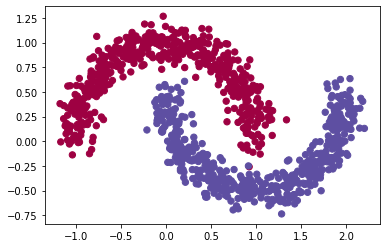

In [13]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [15]:
epochs = 10000
alpha = 5e-3
w1, b1, w2, b2 = train(X_train, y_train, X_test, y_test, epochs, alpha, last=10)

Epoch: 0	Loss: 1.90663		Training Acc: 0.50714	Test Acc: 0.48333
Epoch: 1000	Loss: 0.31809		Training Acc: 0.86143	Test Acc: 0.85000
Epoch: 2000	Loss: 0.25336		Training Acc: 0.87857	Test Acc: 0.86667
Epoch: 3000	Loss: 0.23052		Training Acc: 0.88571	Test Acc: 0.88333
Epoch: 4000	Loss: 0.21613		Training Acc: 0.89286	Test Acc: 0.89000
Epoch: 5000	Loss: 0.20427		Training Acc: 0.90000	Test Acc: 0.89667
Epoch: 6000	Loss: 0.19316		Training Acc: 0.91000	Test Acc: 0.89667
Epoch: 7000	Loss: 0.18314		Training Acc: 0.91857	Test Acc: 0.90000
Epoch: 8000	Loss: 0.17385		Training Acc: 0.92000	Test Acc: 0.90333
Epoch: 9000	Loss: 0.16552		Training Acc: 0.92714	Test Acc: 0.90333
Epoch: 10000	Loss: 0.15773		Training Acc: 0.93429	Test Acc: 0.91667


In [16]:
pred = predict(X_test, y_test, w1, b1, w2, b2)
print('Test accuracy: ', pred)

Test accuracy:  0.9166666666666666
